<a href="https://colab.research.google.com/github/vasvarym/FakeNewsProject/blob/main/nelasentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
import re

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
import string
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline


from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate, GridSearchCV

from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

#Import Dataset

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Raw Dataset Without sentiment
#data = pd.read_csv("/content/drive/My Drive/nela10sample.csv")
#data.content=data.content.astype(str)
#data.title=data.title.astype(str)

In [174]:
#Large sampled dataset without sentiment and emotion
#data = pd.read_csv("/content/drive/My Drive/nela10sample.csv")
# Processed dataset with sentiment and emotion
data = pd.read_csv("/content/drive/My Drive/nelasentemofinal.csv")


In [ ]:
data

,content,Reliability,Polarity,Happy,Angry,Surprise,Sad,Fear
0,Students could take SAT at home if schools rem...,0,0.079265,0.16,0.03,0.17,0.14,0.50
1,Detroit facing fresh fiscal woes with coronavi...,0,0.072199,0.07,0.09,0.18,0.20,0.46
2,Thousands protest Michigan governor's social d...,0,-0.072874,0.07,0.06,0.20,0.24,0.43
3,Baltimore Police defends planned aerial survei...,0,0.033147,0.12,0.00,0.12,0.17,0.57
4,Attorney who fought for civil rights in Louisi...,0,0.185473,0.09,0.03,0.24,0.14,0.49
...,...,...,...,...,...,...,...,...
19995,North Korea Power Vacuum Brings US And China T...,1,0.292932,0.12,0.12,0.12,0.38,0.25
19996,Twitter Suspends Account of Biotech Company Te...,1,0.094251,0.07,0.07,0.07,0.22,0.56
19997,Riots Have Started In Venezuela! Will It Come ...,1,0.000000,0.00,0.00,0.50,0.00,0.50
19998,True Coronavirus Death Toll Likely 60% Higher ...,1,0.065671,0.03,0.03,0.06,0.17,0.70


In [ ]:
print (data.loc[19999,'content'])

WHO Mysteriously Deletes Tweet About Reinfection as ‘Immunity Passports’ Being Debated The World Health Organization (WHO) on Sunday deleted an alarming tweet for unknown reasons suggesting COVID-19 infected persons could catch the disease a second time.

The tweet was live long enough to be picked up in the media — some of which reported the information as “misleading” — before its quiet deletion later in the day.

The tweet garnered well over ten thousand retweets and tens of thousands of “likes” before it disappeared.

The controversial statement said: “There is currently no evidence that people who have recovered from #COVID19 and have antibodies are protected from a second infection.”

Health experts and some publications immediately took issue with the phraseology, pointing out that “no evidence” will be taken broadly taken as ‘confirmation’ that people are not protected via antibodies.

Most epidemiologists believe COVID-19 survivors do build up some immunity, but still admit th

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


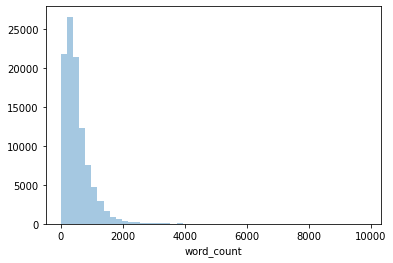

In [ ]:
data['word_count'] = [len(s.split()) for s in data['content']]
sb.distplot(data['word_count'][(data['word_count'] < 10000)], kde=False, rug=False)


In [ ]:
data.dtypes

content        object
Reliability     int64
dtype: object

# Ignore this if pre-processed dataset is loaded

In [ ]:
#dropping rows including null values
data = data.dropna()

In [ ]:
# Change labels
def change_labels(y):
    if y == 0:
        return 0
    if y == 2:
        return 1

In [ ]:
# Shape of each set

print("Shape of DATA: ", data.shape)

Shape of DATA:  (102554, 3)


In [ ]:
# Concetanate title and content
data["content"] = data["title"] + " " + data["content"]

#Keep only content, Reliability as columns
data = data.drop(['id','date','source','title','author','url','published','published_utc','collection_utc'],axis=1)

In [ ]:
#Change labels to 0 and 1.
data["Reliability"] = data.Reliability.apply(change_labels)

print(data["Reliability"])

# Sentiment Analysis (ignore if final dataset is loaded)

Get polarity and subjectivity scores of the news with TextBlob

In [ ]:
# Import the TextBlob
from textblob import TextBlob

In [ ]:
data

,content,Reliability
0,Students could take SAT at home if schools rem...,0
1,Detroit facing fresh fiscal woes with coronavi...,0
2,Thousands protest Michigan governor's social d...,0
3,Baltimore Police defends planned aerial survei...,0
4,Attorney who fought for civil rights in Louisi...,0
...,...,...
102549,North Korea Power Vacuum Brings US And China T...,1
102550,Twitter Suspends Account of Biotech Company Te...,1
102551,Riots Have Started In Venezuela! Will It Come ...,1
102552,True Coronavirus Death Toll Likely 60% Higher ...,1


In [ ]:
# Add polarities and subjectivities into the DataFrame using TextBlob
data['Polarity'] = data['content'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Display the Polarity and Subjectivity columns of train dataset
display(data[["content","Polarity"]].head(10))

In [ ]:
# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Apply the funtion on Polarity column and add the results into a new column
data["SentLabel"] = data["Polarity"].apply(analyse_polarity)

# Display the Polarity and Subjectivity Analysis
display(data[["SentLabel"]].head(10))

,SentLabel
0,Positive
1,Positive
2,Negative
3,Positive
4,Positive
5,Positive
6,Negative
7,Positive
8,Negative
9,Negative


In [ ]:
# Print the value counts of the SentLabel column
print(data["SentLabel"].value_counts())

Positive    16227
Negative     3447
Neutral       326
Name: SentLabel, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


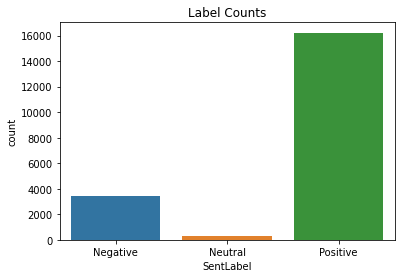

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Change the datatype as "category"
data["SentLabel"] = data["SentLabel"].astype("category")

# Visualize the Label counts
sns.countplot(data["SentLabel"])
plt.title("Label Counts")
plt.show()

# Emotion Analysis (ignore if final dataset is leaded)

In [ ]:
#Install package using pip
!pip install text2emotion

     |████████████████████████████████| 61kB 1.7MB/s 
     |████████████████████████████████| 133kB 3.6MB/s 


In [ ]:
#Import the modules
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Extracting emotions for each article in the dataset
data['Emotions'] = data["content"].apply(te.get_emotion)

In [ ]:
#saving the emotions in a separate dataframe
nelasample_emotions = data['Emotions']

In [ ]:
data['Emotions'][0]['Happy']

0.16

In [ ]:
#extracting emotions froma  dictionary into new rows
dataemo = pd.DataFrame(df_new['Emotions'].tolist())

In [ ]:
dataemo

,Happy,Angry,Surprise,Sad,Fear
0,0.16,0.03,0.17,0.14,0.50
1,0.07,0.09,0.18,0.20,0.46
2,0.07,0.06,0.20,0.24,0.43
3,0.12,0.00,0.12,0.17,0.57
4,0.09,0.03,0.24,0.14,0.49
...,...,...,...,...,...
19995,0.12,0.12,0.12,0.38,0.25
19996,0.07,0.07,0.07,0.22,0.56
19997,0.00,0.00,0.50,0.00,0.50
19998,0.03,0.03,0.06,0.17,0.70


In [ ]:
#attaching emotions back to the original dataset, now in separate rows
data = pd.concat([data, dataemo], axis=1)

In [ ]:
data

,content,Reliability,Polarity,Happy,Angry,Surprise,Sad,Fear
0,Students could take SAT at home if schools rem...,0,0.079265,0.16,0.03,0.17,0.14,0.50
1,Detroit facing fresh fiscal woes with coronavi...,0,0.072199,0.07,0.09,0.18,0.20,0.46
2,Thousands protest Michigan governor's social d...,0,-0.072874,0.07,0.06,0.20,0.24,0.43
3,Baltimore Police defends planned aerial survei...,0,0.033147,0.12,0.00,0.12,0.17,0.57
4,Attorney who fought for civil rights in Louisi...,0,0.185473,0.09,0.03,0.24,0.14,0.49
...,...,...,...,...,...,...,...,...
19995,North Korea Power Vacuum Brings US And China T...,1,0.292932,0.12,0.12,0.12,0.38,0.25
19996,Twitter Suspends Account of Biotech Company Te...,1,0.094251,0.07,0.07,0.07,0.22,0.56
19997,Riots Have Started In Venezuela! Will It Come ...,1,0.000000,0.00,0.00,0.50,0.00,0.50
19998,True Coronavirus Death Toll Likely 60% Higher ...,1,0.065671,0.03,0.03,0.06,0.17,0.70


In [ ]:
#saving it onto google drive as a csv file
data.to_csv("/content/drive/My Drive/nelasentemofinal.csv", index=False)

# Text-PreProcessing

In [175]:
#Removing noise from the text, such as special characters, numbers and hyperlinks
def rem_noise(text):
  text = text.translate(str.maketrans('','',string.punctuation))

  text =  re.sub('[0-9]+','',text)

  text = re.sub('https?:\S+','',text)

  text =  re.sub('<.*?>'," ",text)

  return text

In [176]:
#Removing stopwords(commonly used words such as "are" and "us" from text)
stop = set(stopwords.words('english'))

def rem_stopwords(text):
    
    words = [ch for ch in text if ch not in stop]
    words = "".join(words).split()
    words = [words.lower() for words in text.split()]
    
    return words

In [177]:
#Assigning each word a number
def tokenize_statements(text):
    
    # Tokenize the words
    tokenized = word_tokenize(text)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words, changing text to lowercase
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token.lower(), pos='a') for token in tokenized]
    
    return tokenized

#TF-IDF Vectorizer

In [178]:
#Keep only content, Polarity as columns
y = data['Reliability']
x = data.drop(['Reliability'], axis = 1)

#y = data['Reliability']
#x = data.drop(['Reliability'],axis=1)
x['content'] = x['content'].apply(rem_noise)

In [179]:
y = y.astype('float64')

In [180]:
x.shape

(20000, 7)

In [181]:
# split the dataset into training and testing datasets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [182]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 7)
(16000,)
(4000, 7)
(4000,)


In [183]:
X_train

,content,Polarity,Happy,Angry,Surprise,Sad,Fear
10867,Nicki Minaj’s Brother Sentenced to Years to L...,0.123712,0.04,0.01,0.42,0.19,0.33
8285,EU sets up million budget for humanitarian ai...,0.065278,0.00,0.08,0.23,0.19,0.50
13147,Theresa May’s Brexit negotiator Oliver Robbins...,0.087719,0.09,0.06,0.18,0.18,0.48
5984,Democratic candidates target Trump in New Hamp...,0.215341,0.00,0.00,0.50,0.00,0.50
9303,Metra tells customers to make sure they pay th...,0.284091,0.00,0.00,0.22,0.22,0.56
...,...,...,...,...,...,...,...
15153,Bride reads out cheating fiancé’s racy affair ...,0.086265,0.14,0.02,0.42,0.14,0.28
15212,Matt Chapman has an early fancy for the Champi...,0.093587,0.19,0.09,0.20,0.11,0.40
15433,As UK sails free from Brussels let’s hope Bori...,0.039904,0.10,0.03,0.22,0.28,0.37
13597,Evil stepdad who tortured girlfriend’s son t...,-0.209570,0.08,0.08,0.38,0.10,0.36


In [184]:
# Vectorize the text so the models can interpret it. max_features = 2000, so the vectors are not too large
vectorizer = TfidfVectorizer(tokenize_statements, max_features = 20000)
x_train_vectorized = vectorizer.fit_transform(X_train.content.values)
x_test_vectorized = vectorizer.transform(X_test.content.values)

In [185]:
print (x_train_vectorized.shape)
print (x_test_vectorized.shape)
print (y_train.shape)
print (y_test.shape)

(16000, 20000)
(4000, 20000)
(16000,)
(4000,)


In [186]:
X_train

,content,Polarity,Happy,Angry,Surprise,Sad,Fear
10867,Nicki Minaj’s Brother Sentenced to Years to L...,0.123712,0.04,0.01,0.42,0.19,0.33
8285,EU sets up million budget for humanitarian ai...,0.065278,0.00,0.08,0.23,0.19,0.50
13147,Theresa May’s Brexit negotiator Oliver Robbins...,0.087719,0.09,0.06,0.18,0.18,0.48
5984,Democratic candidates target Trump in New Hamp...,0.215341,0.00,0.00,0.50,0.00,0.50
9303,Metra tells customers to make sure they pay th...,0.284091,0.00,0.00,0.22,0.22,0.56
...,...,...,...,...,...,...,...
15153,Bride reads out cheating fiancé’s racy affair ...,0.086265,0.14,0.02,0.42,0.14,0.28
15212,Matt Chapman has an early fancy for the Champi...,0.093587,0.19,0.09,0.20,0.11,0.40
15433,As UK sails free from Brussels let’s hope Bori...,0.039904,0.10,0.03,0.22,0.28,0.37
13597,Evil stepdad who tortured girlfriend’s son t...,-0.209570,0.08,0.08,0.38,0.10,0.36


In [ ]:
#Saving TFIDF vectorizer
import pickle
with open('tfidf.pkl','wb') as f:
    pickle.dump(vectorizer,f)

In [187]:
df_x_train_tfidf =  pd.DataFrame.sparse.from_spmatrix(x_train_vectorized)
df_x_train_tfidf['polarity'] = X_train['Polarity'].values
df_x_train_tfidf['happy'] = X_train['Happy'].values
df_x_train_tfidf['angry'] = X_train['Angry'].values
df_x_train_tfidf['surprise'] = X_train['Surprise'].values
df_x_train_tfidf['sad'] = X_train['Sad'].values
df_x_train_tfidf['fear'] = X_train['Fear'].values

df_x_test_tfidf =  pd.DataFrame.sparse.from_spmatrix(x_test_vectorized)
df_x_test_tfidf['polarity'] = X_test['Polarity'].values
df_x_test_tfidf['happy'] = X_test['Happy'].values
df_x_test_tfidf['angry'] = X_test['Angry'].values
df_x_test_tfidf['surprise'] = X_test['Surprise'].values
df_x_test_tfidf['sad'] = X_test['Sad'].values
df_x_test_tfidf['fear'] = X_test['Fear'].values

df_x_train_tfidf_nopol = x_train_vectorized
df_x_test_tfidf_nopol = x_test_vectorized

In [ ]:
x_train_vectorized.shape

(16000, 20000)

# Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(df_x_train_tfidf, y_train)
logR_predicted = log_reg.predict(df_x_test_tfidf)
print(f"{log_reg.__class__.__name__} accuracy: {log_reg.score(df_x_test_tfidf, y_test)}")

LogisticRegression accuracy: 0.86875


In [ ]:
log_reg_nopol = LogisticRegression()
log_reg_nopol.fit(df_x_train_tfidf_nopol, y_train)
logR_predicted_nopol = log_reg_nopol.predict(df_x_test_tfidf_nopol)
print(f"{log_reg_nopol.__class__.__name__} accuracy: {log_reg_nopol.score(df_x_test_tfidf_nopol, y_test)}")

LogisticRegression accuracy: 0.86825


In [ ]:
print(classification_report(y_test, logR_predicted_nopol))
print('\n')
print(confusion_matrix(y_test, logR_predicted_nopol))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1956
         1.0       0.89      0.85      0.87      2044

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



[[1744  212]
 [ 315 1729]]


In [ ]:
cv_results = cross_validate(log_reg, df_x_train_tfidf, y_train, cv=2)
cv_results['test_score'].mean()

0.8454999999999999

#Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest.fit(df_x_train_tfidf, y_train)

print(f"{random_forest.__class__.__name__} accuracy: {random_forest.score(df_x_test_tfidf, y_test)}")

RandomForestClassifier accuracy: 0.8125


In [ ]:
random_forest_nopol = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest_nopol.fit(df_x_train_tfidf_nopol, y_train)

print(f"{random_forest_nopol.__class__.__name__} accuracy: {random_forest_nopol.score(df_x_test_tfidf_nopol, y_test)}")

RandomForestClassifier accuracy: 0.7925


In [ ]:
rForest_pred = random_forest.predict(df_x_test_tfidf)
print(classification_report(y_test, rForest_pred))
print('\n')
print(confusion_matrix(y_test, rForest_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       210
           2       0.82      0.69      0.75       190

    accuracy                           0.78       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



[[181  29]
 [ 59 131]]


In [ ]:
cv_results = cross_validate(random_forest, df_x_train_tfidf, y_train, cv=5)
cv_results['test_score'].mean()

#SVM

In [ ]:
svm = LinearSVC()
svm.fit(df_x_train_tfidf, y_train)
print(f"{svm.__class__.__name__} accuracy: {svm.score(df_x_test_tfidf, y_test)}")

LinearSVC accuracy: 0.89075


In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
  
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(df_x_train_tfidf, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

In [ ]:
grid_predictions = grid.predict(df_x_test_tfidf)
  
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
svm_nopol = LinearSVC()
svm_nopol.fit(df_x_train_tfidf_nopol, y_train)
print(f"{svm_nopol.__class__.__name__} accuracy: {svm_nopol.score(df_x_test_tfidf_nopol, y_test)}")

LinearSVC accuracy: 0.88925


In [ ]:
svm_pred = svm.predict(df_x_test_tfidf)

print(classification_report(y_test, svm_pred))
print('\n')
print(confusion_matrix(y_test, svm_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1956
         1.0       0.90      0.88      0.89      2044

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



[[1764  192]
 [ 245 1799]]


In [ ]:
cv_results = cross_validate(svm, df_x_train_tfidf_nopol, y_train, cv=5)
cv_results['test_score'].mean()

0.8809374999999999

In [ ]:
clf = GridSearchCV(svm.SVC(), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=2, return_train_score=False)
clf.fit(df_x_train_tfidf, y_train)
clf.cv_results_  

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,40.174047,0.130484,28.985952,0.230865,1,linear,"{'C': 1, 'kernel': 'linear'}",0.82500,0.82625,0.825625,0.000625,2
1,40.844855,0.289318,28.854964,0.343762,10,linear,"{'C': 10, 'kernel': 'linear'}",0.83875,0.84625,0.842500,0.003750,1


In [ ]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.825625
1,10,linear,0.842500


In [ ]:
# saving model
with open('svm.pkl','wb') as f:
    pickle.dump(svm,f)

#MLP

In [188]:
clf = MLPClassifier(hidden_layer_sizes=(64,64,64), random_state=1, max_iter=300).fit(df_x_train_tfidf, y_train)

In [189]:
clf.score(df_x_test_tfidf, y_test)

0.8765

In [190]:
mlp_pred = clf.predict(df_x_test_tfidf)

In [191]:
print(classification_report(y_test, mlp_pred, zero_division = 1))
print(confusion_matrix(y_test, mlp_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      2003
         1.0       0.88      0.87      0.88      1997

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000

[[1771  232]
 [ 262 1735]]


#Glove LSTM

In [ ]:
#glovedf = data.reset_index(drop=True)
glovedf = data.reset_index(drop=True)
contentglove = glovedf.drop(['Reliability'],axis=1)

In [ ]:
glovedf

,content,Reliability,Polarity,Happy,Angry,Surprise,Sad,Fear,SentLabel
0,Students could take SAT at home if schools rem...,0,0.079265,0.16,0.03,0.17,0.14,0.50,Positive
1,Detroit facing fresh fiscal woes with coronavi...,0,0.072199,0.07,0.09,0.18,0.20,0.46,Positive
2,Thousands protest Michigan governor's social d...,0,-0.072874,0.07,0.06,0.20,0.24,0.43,Negative
3,Baltimore Police defends planned aerial survei...,0,0.033147,0.12,0.00,0.12,0.17,0.57,Positive
4,Attorney who fought for civil rights in Louisi...,0,0.185473,0.09,0.03,0.24,0.14,0.49,Positive
...,...,...,...,...,...,...,...,...,...
19995,North Korea Power Vacuum Brings US And China T...,1,0.292932,0.12,0.12,0.12,0.38,0.25,Positive
19996,Twitter Suspends Account of Biotech Company Te...,1,0.094251,0.07,0.07,0.07,0.22,0.56,Positive
19997,Riots Have Started In Venezuela! Will It Come ...,1,0.000000,0.00,0.00,0.50,0.00,0.50,Neutral
19998,True Coronavirus Death Toll Likely 60% Higher ...,1,0.065671,0.03,0.03,0.06,0.17,0.70,Positive


In [ ]:
#Clean text
cleantext = contentglove['content'].apply(rem_noise)
cleantext = cleantext.apply(rem_stopwords)

In [ ]:
x = cleantext.values
y = glovedf['Reliability']

In [ ]:
y.shape

(20000,)

In [ ]:
#Tokenize cleaned text using Keras tokenizer, then creating sequences for the model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_to_index = tokenizer.word_index
contentSequence = tokenizer.texts_to_sequences(x)

In [ ]:
vocab_size =  len(word_to_index) #Size of all the words in the corpus
oov_tok = "<OOV>" #In case some articles are shorter than max_lenght, sequences are padded with this token
max_length = 2000 #Length of sequence for each article
embedding_dim = 100 #Max dimension of embedding matrix

In [ ]:
print (vocab_size)

137052


In [ ]:
contentSequence = pad_sequences(contentSequence, maxlen=max_length) #Padding sequences

In [ ]:
contentSequence

array([[    0,     0,     0, ...,   718,    59,   662],
       [    0,     0,     0, ...,  1344,     2, 60232],
       [    0,     0,     0, ...,     2,    26,   246],
       ...,
       [    0,     0,     0, ...,   188,    45,     9],
       [    0,     0,     0, ...,   152,    10,   436],
       [    0,     0,     0, ...,    44, 35386,   327]], dtype=int32)

#Glove Embedding

In [ ]:
# load the whole embedding into memory

embeddings_index = {};
with open('/content/drive/My Drive/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

# create a weight matrix for words

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
embeddings_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14068   ,  0.087165  ,  0.32644001, ..., -0.30822   ,
        -0.73694003,  0.27818999],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
type (contentSequence)

numpy.ndarray

In [ ]:
df_lstm =  pd.DataFrame(contentSequence)
df_lstm['polarity'] = glovedf['Polarity'].values

In [ ]:
df_lstm.shape

(20000, 2001)

In [ ]:
#Splitting dataset into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_lstm,y,test_size=0.20,random_state=1)

In [ ]:
X_train.columns

Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,
       ...
             1991,       1992,       1993,       1994,       1995,       1996,
             1997,       1998,       1999, 'polarity'],
      dtype='object', length=2001)

In [ ]:
polarity_xtrain = X_train.polarity.values
X_train = X_train.drop(['polarity'], axis=1)

In [ ]:
polarity_xtest = X_test.polarity.values
X_test = X_test.drop(['polarity'], axis=1)

In [ ]:
X_train.shape

(16000, 2000)

In [ ]:
xtrain_glove = np.array(X_train)
xtest_glove = np.array(X_test)

In [ ]:
xtest_glove

array([[     0,      0,      0, ...,    144,      2,     68],
       [     0,      0,      0, ...,     92,      6,   1095],
       [     0,      0,      0, ...,    997,      1,    778],
       ...,
       [     0,      0,      0, ...,   6550,   1653,   5624],
       [     0,      0,      0, ..., 129096,     27, 129097],
       [     0,      0,      0, ...,      2,     84,    868]], dtype=int32)

# Defining Neural Networks

#LSTM

In [ ]:
#model = Sequential()
#Non-trainable embeddidng layer
#model.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
#LSTM 
#model.add(LSTM(units=128))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#Defining Neural Network
model_glove = Sequential()
#Non-trainable embeddidng layer
model_glove.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
model_glove.add(Bidirectional(LSTM(units=64)))
model_glove.add(Dropout(0.2))
model_glove.add(Dense(units=32, name = 'last', activation='sigmoid'))
model_glove.add(Dense(units=1, activation='sigmoid'))
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#del (model)

In [ ]:
model_glove.summary()

In [ ]:
modeltrain = model_glove.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs=10)

Epoch 1/10
500/500 [==============================] - 93s 187ms/step - loss: 0.1651 - accuracy: 0.9394 - val_loss: 0.3150 - val_accuracy: 0.8752
Epoch 2/10
500/500 [==============================] - 93s 187ms/step - loss: 0.1449 - accuracy: 0.9468 - val_loss: 0.2808 - val_accuracy: 0.8925
Epoch 3/10
500/500 [==============================] - 94s 187ms/step - loss: 0.1243 - accuracy: 0.9560 - val_loss: 0.3283 - val_accuracy: 0.8733
Epoch 4/10
500/500 [==============================] - 93s 187ms/step - loss: 0.1092 - accuracy: 0.9615 - val_loss: 0.3145 - val_accuracy: 0.8915
Epoch 5/10
500/500 [==============================] - 93s 186ms/step - loss: 0.0931 - accuracy: 0.9671 - val_loss: 0.3395 - val_accuracy: 0.8875
Epoch 6/10
500/500 [==============================] - 93s 186ms/step - loss: 0.0841 - accuracy: 0.9707 - val_loss: 0.3527 - val_accuracy: 0.8865
Epoch 7/10
500/500 [==============================] - 93s 187ms/step - loss: 0.0724 - accuracy: 0.9756 - val_loss: 0.3975 - val_ac

In [ ]:
temp_model =  Model(model_glove.inputs, model_glove.get_layer('last').output)

In [ ]:
historytrain = temp_model.predict(X_train)

In [ ]:
historytest = temp_model.predict(X_test)

In [ ]:
temp_xtrain = pd.DataFrame(historytrain)

In [ ]:
temp_xtest = pd.DataFrame(historytest)

In [ ]:
temp_xtrain['polarity'] = polarity_xtrain

In [ ]:
temp_xtest['polarity'] = polarity_xtest

In [ ]:
model_glove2 = Sequential()
model_glove2.add(Input(shape = (33)))
#LSTM
model_glove2.add(Dense(units = 32 , activation = 'relu'))
model_glove2.add(Dense(1, activation='sigmoid'))
model_glove2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_glove2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2train = model_glove2.fit(temp_xtrain, y_train, validation_data = (temp_xtest,y_test) , epochs=20)

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 0.3415 - accuracy: 0.8320 - val_loss: 0.3071 - val_accuracy: 0.8885
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9527 - val_loss: 0.3052 - val_accuracy: 0.8890
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1402 - accuracy: 0.9490 - val_loss: 0.3041 - val_accuracy: 0.8860
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9493 - val_loss: 0.3039 - val_accuracy: 0.8867
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1389 - accuracy: 0.9503 - val_loss: 0.3073 - val_accuracy: 0.8888
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9476 - val_loss: 0.3054 - val_accuracy: 0.8885
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1491 - accuracy: 0.9458 - val_loss: 0.3098 - val_accuracy: 0.8882
Epoch 

In [ ]:
y_pred_glove_nopol = (model_glove2.predict(temp_xtest) > 0.5).astype("int")

In [ ]:
print(classification_report(y_test, y_pred_glove, zero_division = 1))
print(confusion_matrix(y_test, y_pred_glove))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2045
           1       0.88      0.89      0.89      1955

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

[[1818  227]
 [ 217 1738]]


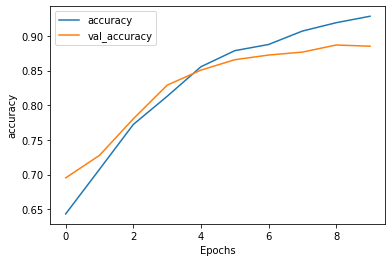

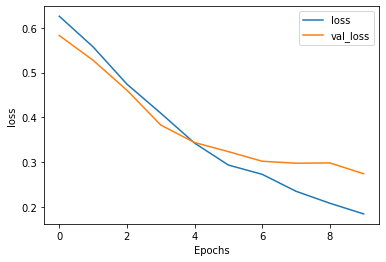

In [ ]:
#plot accuracy and loss
def plot_graphs(model2train, string):
  plt.plot(modeltrain.history[string])
  plt.plot(modeltrain.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(modeltrain, "accuracy")
plot_graphs(modeltrain, "loss")

In [ ]:
model_noGlove = Sequential()
#Non-trainable embeddidng layer
model_noGlove.add(Embedding(vocab_size+1,50,input_length=max_length))
#LSTM 
model_noGlove.add(LSTM(units=128))
model_noGlove.add(Dense(1, activation='sigmoid'))
model_noGlove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history_noGlove = model_noGlove.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs=5) 

In [ ]:
# Creating bidirectional lstm model
model_bilstm=Sequential()
model_bilstm.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
model_bilstm.add(Bidirectional(LSTM(units=64))) # Bidirectional LSTM layer
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(32,activation='relu'))
model_bilstm.add(Dense(1,activation='sigmoid'))
model_bilstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_bilstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2000, 100)         13705300  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 13,793,941
Trainable params: 88,641
Non-trainable params: 13,705,300
_________________________________________________________________


In [ ]:
#del (model_bilstm)

In [ ]:
# Fitting the model
history_bilstm = model_bilstm.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs=10, batch_size= 64)

Epoch 1/10
500/500 [==============================] - 92s 184ms/step - loss: 0.6020 - accuracy: 0.6723 - val_loss: 0.5563 - val_accuracy: 0.7168
Epoch 2/10
500/500 [==============================] - 93s 186ms/step - loss: 0.5700 - accuracy: 0.6933 - val_loss: 0.5627 - val_accuracy: 0.7168
Epoch 3/10
500/500 [==============================] - 93s 187ms/step - loss: 0.5142 - accuracy: 0.7419 - val_loss: 0.4977 - val_accuracy: 0.7542
Epoch 4/10
500/500 [==============================] - 93s 186ms/step - loss: 0.4733 - accuracy: 0.7651 - val_loss: 0.4695 - val_accuracy: 0.7788
Epoch 5/10
500/500 [==============================] - 93s 187ms/step - loss: 0.4358 - accuracy: 0.7871 - val_loss: 0.4494 - val_accuracy: 0.7837
Epoch 6/10
500/500 [==============================] - 93s 187ms/step - loss: 0.3997 - accuracy: 0.8116 - val_loss: 0.4193 - val_accuracy: 0.7947
Epoch 7/10
500/500 [==============================] - 94s 187ms/step - loss: 0.4401 - accuracy: 0.7774 - val_loss: 0.4336 - val_ac

In [ ]:
y_pred_glove = (model_bilstm.predict(X_test) > 0.5).astype("int")

In [ ]:
print(classification_report(y_test, y_pred_glove, zero_division = 1))
print(confusion_matrix(y_test, y_pred_glove))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2045
           1       0.88      0.82      0.85      1955

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000

[[1829  216]
 [ 351 1604]]


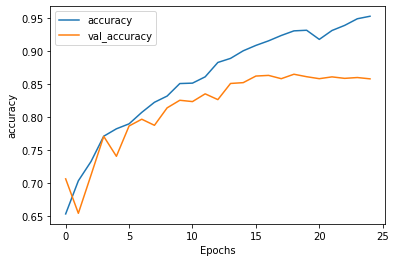

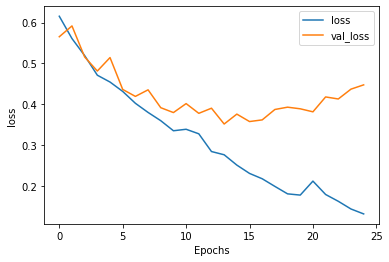

In [ ]:
#plot accuracy and loss
def plot_graphs(history_bilstm, string):
  plt.plot(history_bilstm.history[string])
  plt.plot(history_bilstm.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_bilstm, "accuracy")
plot_graphs(history_bilstm, "loss")

#DistilBert (basic)

In [ ]:
!pip install ktrain

In [ ]:
bertdf = smallerdf.reset_index(drop=True)
contentbert = bertdf.drop(['Polarity'],axis=1)

In [ ]:
cleantext = bertdf['content'].apply(rem_noise)

In [ ]:
x_bert = np.asarray(cleantext)
y_bert = np.asarray(bertdf["Reliability"])

In [ ]:
y_bert

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_bert,y_bert,test_size=0.20,random_state=1)

In [ ]:
y_train

In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=[0, 1])
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [ ]:
learner.fit_onecycle(5e-2, 3)

In [ ]:
learner.validate(class_names=[0, 1])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict(X_test[20])

# SAVE PICKLED FILE TO DRIVE

In [ ]:
from google.colab import files
files.download('tfidf.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('svm.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>